In [14]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

encoder = load_model("../Models/encoder_250_dropout_wmse.keras")
print(f"Loaded encoder")
X = np.load("../Data/LPS/lps-lt-150-1500_x.npy",mmap_mode="r")
print(f"Loaded data")

Loaded encoder
Loaded data


In [15]:
# 1. Encode your data (already have latent_vectors)
latent_vectors = encoder.predict(X)
print(f"shape: {latent_vectors.shape}")
del encoder

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
shape: (1640, 250)


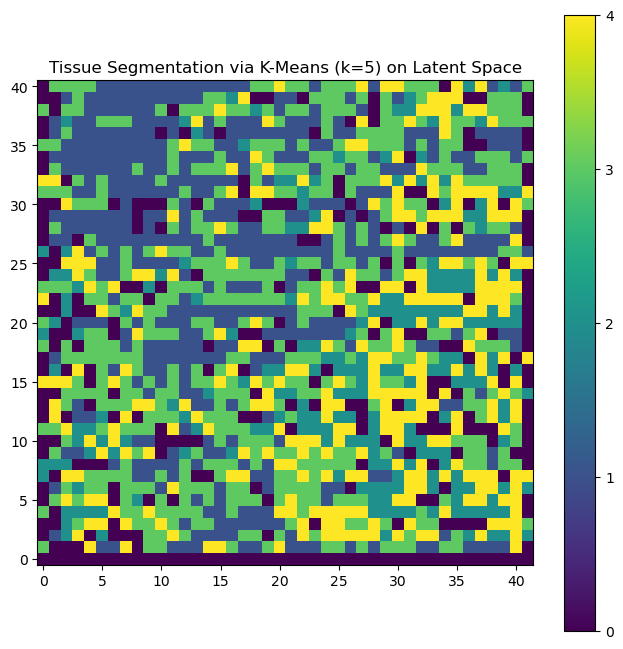

In [18]:

# 3. & 4. Cluster and Visualize Spatially
optimal_k =5 # Choose based on elbow method and domain knowledge
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(latent_vectors)

# Reshape cluster labels to the spatial dimensions of the image
coords = np.load("../Data/LPS/lps-lt-150-1500_coords.npy")  # shape: (num_points, 2)
height, width = 41, 42  # Use existing variables

cluster_map = np.full((height, width), -1, dtype=int)
for idx, (x, y,_) in enumerate(coords):
    cluster_map[y, x] = cluster_labels[idx]

# Plot the cluster map
plt.figure(figsize=(8, 8))
plt.imshow(cluster_map, cmap='viridis', vmin=0, vmax=optimal_k-1, origin='lower')
plt.colorbar(ticks=range(optimal_k))
plt.title(f"Tissue Segmentation via K-Means (k={optimal_k}) on Latent Space")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


centroids = kmeans.cluster_centers_
for i in range(len(centroids)-1):
    for k in range(i+1,len(centroids)):
        mse = mean_squared_error(centroids[i],centroids[k])
        mae = mean_absolute_error(centroids[i],centroids[k])
        print(f"{i}->{k}\nMSE: {mse}\nMAE: {mae}")


0->1
MSE: 0.0011271967086941004
MAE: 0.026585696265101433
0->2
MSE: 0.0012984597124159336
MAE: 0.02896205335855484
0->3
MSE: 0.0005495912046171725
MAE: 0.01871848665177822
0->4
MSE: 0.0006500077433884144
MAE: 0.02061893790960312
1->2
MSE: 0.003768072696402669
MAE: 0.0488489530980587
1->3
MSE: 0.00033870161860249937
MAE: 0.014786135405302048
1->4
MSE: 0.001795058837160468
MAE: 0.033837758004665375
2->3
MSE: 0.0019377060234546661
MAE: 0.03489852324128151
2->4
MSE: 0.0004414364811964333
MAE: 0.016671249642968178
3->4
MSE: 0.0005910902982577682
MAE: 0.019267147406935692
